In [1]:
# HIDE CODE


import re
import os
import sys
import collections
import numpy as np
import pandas as pd
import nibabel as nib
from time import time
from pathlib import Path
from os.path import join as pjoin
from scipy import stats as sp_stats
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


# GitHub
git_path = pjoin(os.environ['HOME'], 'Dropbox/git/Ca-fMRI/')
sys.path.insert(0, git_path)
from utils.plotting import *
from utils.processing import *
from model.mouse import Mice
from model.dataset import FuncData, AnatData

In [2]:
start = time()
mice = Mice()
end = time()

_ = convert_time(end-start)

00 - 00:00:02  (dd - hh:mm:ss)



In [3]:
vars(mice).keys()

dict_keys(['config', 'looper', 'ref', 'T1w', 'mask2d', 'mask3d', 'fineatlas2d', 'fineatlas3d', 'ca', 'bold'])

In [4]:
tasks = []
for key, f_data in mice.ca.items():
    tasks.append(f_data.task)
collections.Counter(tasks)

Counter({'rest': 118, 'led': 90, None: 2})

In [5]:
for key, data in tqdm(mice.ref.items()):
    print(key, data.x.shape, mice.mask2d[key].x.shape)

  0%|          | 0/30 [00:00<?, ?it/s]

sub-SLC01_ses-1 (256, 250) (256, 250)
sub-SLC01_ses-2 (256, 250) (256, 250)
sub-SLC01_ses-3 (256, 250) (256, 250)
sub-SLC02_ses-1 (256, 250) (256, 250)
sub-SLC02_ses-2 (256, 250) (256, 250)
sub-SLC02_ses-3 (256, 250) (256, 250)
sub-SLC03_ses-1 (256, 250) (256, 250)
sub-SLC03_ses-2 (256, 250) (256, 250)
sub-SLC03_ses-3 (256, 250) (256, 250)
sub-SLC04_ses-1 (256, 250) (256, 250)
sub-SLC04_ses-2 (256, 250) (256, 250)
sub-SLC04_ses-3 (256, 250) (256, 250)
sub-SLC05_ses-1 (256, 250) (256, 250)
sub-SLC05_ses-2 (256, 250) (256, 250)
sub-SLC05_ses-3 (256, 250) (256, 250)
sub-SLC06_ses-1 (256, 250) (256, 250)
sub-SLC06_ses-2 (256, 250) (256, 250)
sub-SLC06_ses-3 (256, 250) (256, 250)
sub-SLC07_ses-1 (256, 250) (256, 250)
sub-SLC07_ses-2 (256, 250) (256, 250)
sub-SLC07_ses-3 (256, 250) (256, 250)
sub-SLC08_ses-1 (256, 250) (256, 250)
sub-SLC08_ses-2 (256, 250) (256, 250)
sub-SLC08_ses-3 (256, 250) (256, 250)
sub-SLC09_ses-1 (256, 250) (256, 250)
sub-SLC09_ses-2 (256, 250) (256, 250)
sub-SLC09_se

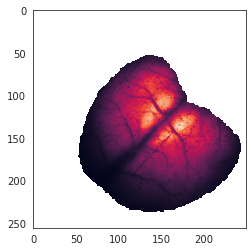

In [6]:
key = mice.get_key(7, 1, -1)

ref = mice.ref[key].get_data()
mask = mice.mask2d[key].get_data()

plt.imshow(np.ma.masked_where(~mask, ref));

## Make plotting functions to visualize data

In [7]:
def plot_ref_images(mice: Mice = None, figsize=(13.5, 5.)):
    mice = Mice() if mice is None else mice
    
    sns.set_style('white')
    nrows, ncols = mice.config.num_sessions, mice.config.num_subjects
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    if len(axes.shape) != 2:
        axes = axes.reshape(nrows, ncols)

    for idx, (key, ref_data) in enumerate(mice.ref.items()):
        subject, session, _ = mice.looper[key]
        i = session - 1
        j = subject - 1

        ref = ref_data.get_data()
        mask = mice.mask2d[key].get_data()

        x = filter_boundaries(ref, mask)[0]
        data2plt = np.ma.masked_where(x == 0, x)
        axes[i, j].imshow(data2plt, interpolation='none', cmap='Greys_r')
        list(map(lambda x: x.set_visible(False), axes[i, j].spines.values()))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

        if j == 0:
            axes[i, j].set_ylabel('ses-{:d}\n'.format(session), fontsize=14)

        if i == 0:
            title = 'sub-SLC{:02d}\n'.format(subject)
            axes[i, j].set_title(title, fontsize=14)

    fig.tight_layout()
    # fig.savefig('reference_spaces.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig, axes

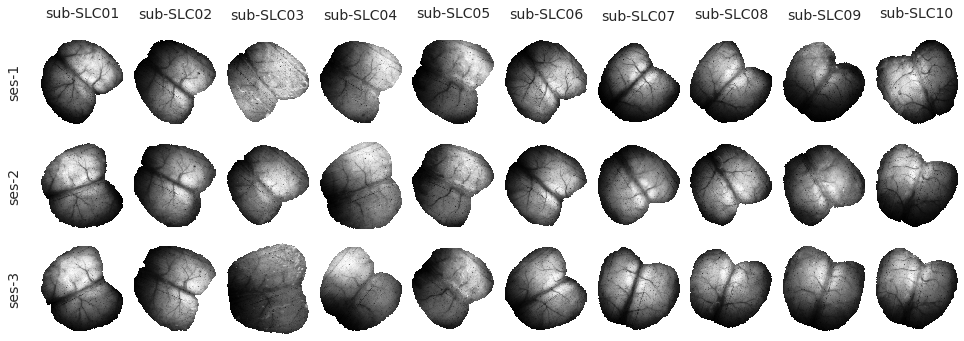

In [8]:
_ = plot_ref_images()

In [9]:
mice